# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Import Data

In [2]:
# read the data from Dataset.csv with encoding ISO-8859-1
dataframe = pd.read_csv('Dataset.csv',encoding='ISO-8859-1')

# show first 5 rows from the data frame.
dataframe.head()

c:\users\hercules\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [3]:
# To show information and data types of the data attributes.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

In [4]:
# Renaming columns bcoz they contain spaces in their names in the Dataframe
dataframe.rename(columns={'ID ':'ID',
                     'name ':'name',
                     'category ':'category',
                     'main_category ':'main_category',
                     'currency ':'currency',
                     'deadline ':'deadline',
                     'goal ':'goal',
                     'launched ':'launched',
                     'pledged ':'pledged',
                     'state ':'state',
                     'backers ':'backers',
                     'country ':'country',
                     'usd pledged ':'usd pledged'},inplace=True)

# Exploratory Data Analysis (EDA)

## Data Visualization

In [5]:
dataframe['state'].isnull().any()

False

In [6]:
# projects state ratio
(dataframe['state'].value_counts()/len(dataframe))*100

failed        51.960154
successful    34.928494
canceled       9.993514
live           1.367722
undefined      1.098069
                ...    
2312           0.000309
320            0.000309
477            0.000309
1404           0.000309
2634           0.000309
Name: state, Length: 410, dtype: float64

In [7]:
# Filtering State column by dropping other columns rather than successful and failed
dataframe=dataframe.drop(dataframe.query("state != 'successful' and state != 'failed'").index, axis=0).reset_index(drop=True)

In [8]:
# though it we will lose some the data but the rest is enough for us.
dataframe['state'].value_counts()

failed        168221
successful    113081
Name: state, dtype: int64

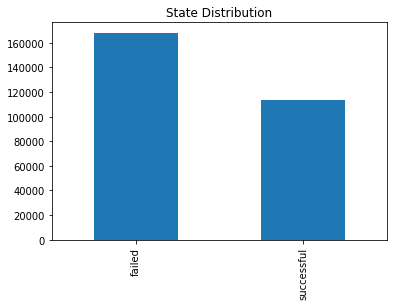

In [9]:
# plot state distribution
dataframe['state'].value_counts().plot(kind='bar')
plt.title('State Distribution')
plt.show()

<AxesSubplot:title={'center':'launched projects per day of week'}, xlabel='launched'>

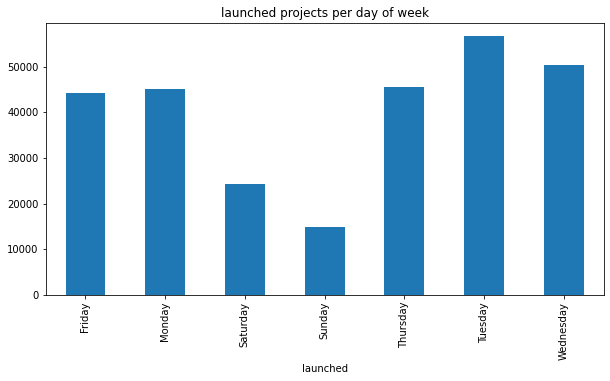

In [10]:
# num of launched projects per day of week 
j=dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.strftime("%A"))]).size()
j.plot(kind='bar',figsize=(10,5),title='launched projects per day of week')

In [11]:
# total projects per year
j=dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size()

<AxesSubplot:title={'center':'Total Projects Per Year'}, xlabel='launched'>

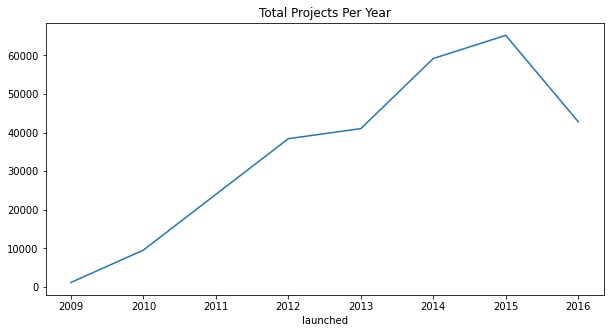

In [12]:
j.plot(figsize=(10,5),title='Total Projects Per Year')

In [13]:
# converting into int
dataframe['backers']=dataframe['backers'].astype('int64')
# average backers
int(dataframe['backers'].mean())

111

<AxesSubplot:xlabel='country', ylabel='main_category'>

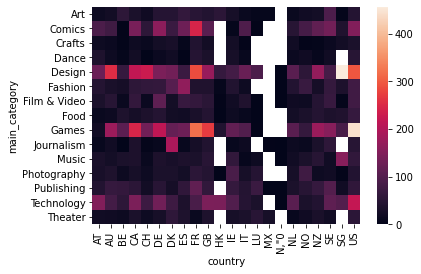

In [14]:
# heat map of average backers by country and main_category
pivot_table = dataframe.pivot_table(index='main_category', columns='country', values='backers', aggfunc='mean')
sns.heatmap(pivot_table)

In [15]:
# projects main category ratio
(dataframe['main_category'].value_counts()/len(dataframe))*100

Film & Video    18.150244
Music           14.559441
Publishing      10.726906
Games            7.962261
Art              7.730482
Technology       7.610682
Design           7.109086
Food             6.703827
Fashion          5.620294
Theater          3.315654
Photography      3.073565
Comics           2.810147
Crafts           2.239941
Journalism       1.253457
Dance            1.134013
Name: main_category, dtype: float64

<AxesSubplot:title={'center':'main_category Ratio Distibution'}, ylabel='main_category'>

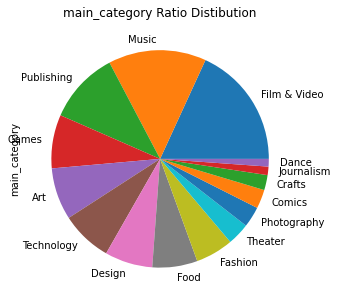

In [16]:
# plot main category ratio distibution
(dataframe['main_category'].value_counts()/len(dataframe)).plot.pie(y='mass', figsize=(5, 5),title='main_category Ratio Distibution')

In [17]:
# count projects by country
dataframe['country'].value_counts()

US      229366
GB       23820
CA        9899
AU        5183
DE        2130
NL        1869
FR        1557
IT        1394
ES        1089
SE        1065
NZ         992
DK         672
IE         472
NO         430
CH         389
BE         329
AT         283
N,"0       210
SG          69
HK          47
LU          33
MX           4
Name: country, dtype: int64

c:\users\hercules\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


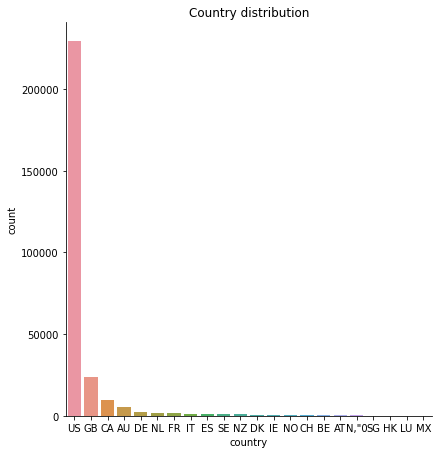

In [18]:
# plot country distribution
sns.catplot('country',data=dataframe, order = dataframe['country'].value_counts().index,kind='count', height=6)
plt.title('Country distribution')
plt.show()

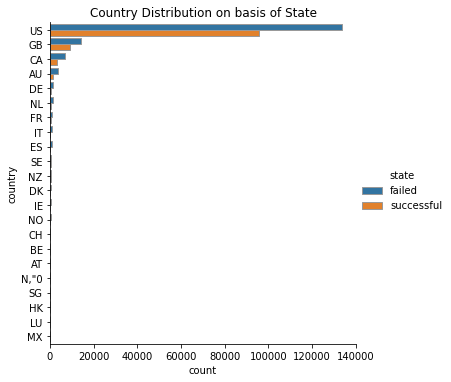

In [19]:
# now country/state distribution.
sns.catplot(y="country", hue="state", kind="count",edgecolor=".6", data=dataframe, order = dataframe['country'].value_counts().index);
plt.title('Country Distribution on basis of State')
plt.show()

In [20]:
# checking which columns has null values
dataframe.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
Unnamed: 13      281302
Unnamed: 14      281302
Unnamed: 15      281302
Unnamed: 16      281302
dtype: int64

In [21]:
dataframe['category'].mode()

0    Product Design
dtype: object

In [22]:
#filling the missing data
dataframe['category'].fillna('Product design',inplace=True)

In [23]:
# we will drop the columns that is known just after project is launched like
# pledged, backers, usd_pledged_real, etc.
# name, ID also are not influcing the machine learning process , so i will delete it as well.
dataframe = dataframe.drop(['ID', 'name', 'usd pledged', 'pledged', 'backers','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1)

In [24]:
dataframe.head()

,category,main_category,currency,deadline,goal,launched,state,country
0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,failed,GB
1,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,failed,US
2,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,failed,US
3,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,successful,US
4,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,successful,US


## Label Encoding

In [25]:
# encode string values to integers for the macheine learning purpose
countryTransformer = preprocessing.LabelEncoder()
currencyTransformer = preprocessing.LabelEncoder()
main_categoryTransformer = preprocessing.LabelEncoder()
categoryTransformer = preprocessing.LabelEncoder()


#Fit-Transforming values into numerics
dataframe['country'] = countryTransformer.fit_transform(dataframe['country'])
dataframe['currency'] = currencyTransformer.fit_transform(dataframe['currency'])
dataframe['main_category'] = main_categoryTransformer.fit_transform(dataframe['main_category'])
dataframe['category'] = categoryTransformer.fit_transform(dataframe['category'])

In [26]:
# convert dates to Unix time in nano seconds
dataframe["launched"] = pd.to_datetime(dataframe["launched"])
dataframe["deadline"] = pd.to_datetime(dataframe["deadline"])
dataframe["deadline"] =  dataframe.deadline.values.astype(np.int64)
dataframe["launched"] =  dataframe.launched.values.astype(np.int64)
dataframe["goal"] =  dataframe.goal.values.astype(np.float64)


# and now i will add a new feature based on deadline and launched
# project_length will be deadline - launched
dataframe["project_length"] = dataframe["deadline"] - dataframe["launched"]

In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281302 entries, 0 to 281301
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   category        281302 non-null  int32  
 1   main_category   281302 non-null  int32  
 2   currency        281302 non-null  int32  
 3   deadline        281302 non-null  int64  
 4   goal            281302 non-null  float64
 5   launched        281302 non-null  int64  
 6   state           281302 non-null  object 
 7   country         281302 non-null  int32  
 8   project_length  281302 non-null  int64  
dtypes: float64(1), int32(4), int64(3), object(1)
memory usage: 15.0+ MB


In [28]:
# and now there is no need for deadline and launched
dataframe = dataframe.drop(['deadline', 'launched'], axis=1)

In [29]:
dataframe.head()

,category,main_category,currency,goal,state,country,project_length
0,107,12,5,1000.0,failed,9,5095412000000000
1,92,6,12,45000.0,failed,21,3888000000000000
2,89,10,12,5000.0,failed,21,2595600000000000
3,122,7,12,50000.0,successful,21,3024000000000000
4,58,7,12,1000.0,successful,21,1728000000000000


## Splitting Data

In [30]:
# X is the dataframe without the state column
X = dataframe.drop('state', axis=1)

# Y is the state column
Y = dataframe['state']

In [31]:
# here we are splitting the data into 80% and 20%
# 80% is for the model training X_train, Y_train
# 20% is for the model testing X_test, Y_test
# we will predict the state of X_test and compare it to the real data Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
# now let us check multiple classification machine learning models


# prepare models
classifiers = [
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

# evaluate one by one to check who is the most accurate 
for clf in classifiers:
    clf.fit(X_train, Y_train)
    
    print("="*30)
    print(clf.__class__.__name__)
    # __class__.__name__ is to avoide to print the hole name and class of it.
    
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    
    print("Accuracy: {:.2%}".format(acc))

print("="*30)
print('Finish')

DecisionTreeClassifier
Accuracy: 62.71%
GradientBoostingClassifier
Accuracy: 67.35%
KNeighborsClassifier
Accuracy: 61.07%
RandomForestClassifier
Accuracy: 64.51%
GaussianNB
Accuracy: 59.62%
Finish


## Data Tuning

In [33]:
# we can see that GradientBoostingClassifier is the most accurist model
# so lets perform fine tuning on the learning_rate attribute of the model

learning_rates = [0.01, 0.1, 0.25, 0.5,0.75, 1]
for lrn in learning_rates:
    
    clf = GradientBoostingClassifier(learning_rate=lrn)
    clf.fit(X_train, Y_train)
    
    print("="*30)
    print(lrn)
    
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    print("Accuracy: {:.2%}".format(acc))
    
    
print("="*30)
print('Finish')

0.01
Accuracy: 62.72%
0.6271840173477187
0.1
Accuracy: 67.35%
0.6734860738344501
0.25
Accuracy: 68.06%
0.6805602459963385
0.5
Accuracy: 68.17%
0.6817155756207675
0.75
Accuracy: 68.38%
0.6837596203409111
1
Accuracy: 68.21%
0.6821421588667105
Finish


## Fitting the Data with best Learning rate

In [34]:
# we will use the best performance learning rate

clf = GradientBoostingClassifier(learning_rate=0.75)
clf.fit(X_train, Y_train)

print('****Final Results****')
prediction = clf.predict(X_test)
acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.2%}".format(acc))

****Final Results****
Accuracy: 68.38%


In [35]:
# comparing prediction to true data
np.column_stack((prediction,Y_test))

array([['failed', 'failed'],
       ['successful', 'failed'],
       ['failed', 'failed'],
       ...,
       ['failed', 'failed'],
       ['failed', 'successful'],
       ['successful', 'successful']], dtype=object)

## Feature Importance

<AxesSubplot:title={'center':'Feature Importance Distribution'}>

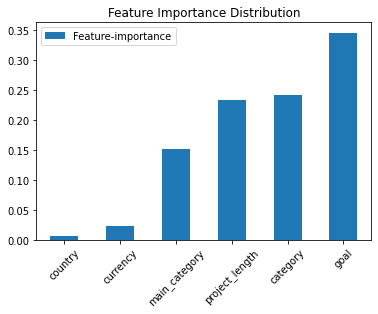

In [36]:
# Feature Importance is used to analise the importance of that perticular column.
# let us see the feature importance order of the predition model.
feats = {}
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 


importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance').plot(kind='bar', rot=45,title='Feature Importance Distribution')

## Testing on New data

In [37]:
futureData = pd.DataFrame(columns=['category', 'main_category', 'currency', 'country', 'deadline', 'goal', 'launched'])
futureData.loc[0] = ['Restaurants', 'Food', 'GBP', 'US', '2019-07-30', '60000.0', '2019-04-01 12:00:00']

In [38]:
futureData.head()

,category,main_category,currency,country,deadline,goal,launched
0,Restaurants,Food,GBP,US,2019-07-30,60000.0,2019-04-01 12:00:00


In [39]:
futureData['category'] = categoryTransformer.transform(futureData['category'])
futureData['main_category'] = main_categoryTransformer.transform(futureData['main_category'])
futureData['currency'] = currencyTransformer.transform(futureData['currency'])
futureData['country'] = countryTransformer.transform(futureData['country'])

In [40]:
futureData["launched"] = pd.to_datetime(futureData["launched"])
futureData["deadline"] = pd.to_datetime(futureData["deadline"])
futureData["deadline"] =  futureData.deadline.values.astype(np.int64)
futureData["launched"] =  futureData.launched.values.astype(np.int64)

In [41]:
futureData["project_length"] = futureData["deadline"] - futureData["launched"]
futureData = futureData.drop(['deadline', 'launched'], axis=1)

In [42]:
futureData.head()

,category,main_category,currency,country,goal,project_length
0,122,7,5,21,60000.0,10324800000000000


## Predicting new data with our best model

In [43]:
prediction = clf.predict(futureData)
prediction

array(['failed'], dtype=object)